Name: Deep Pawar (A20545137)

Professor: Oleksandr Narykov

Institute: Illinois Institute of Technology

CSP 571: Data Preparation and Analysis

Fall 2024 - Assignment 2

Task: Downloading and Loading the "Automobile" Dataset

In [23]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset "Automobile" from the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

df = pd.read_csv(url, names=columns)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df["engine-size"] = pd.to_numeric(df["engine-size"], errors='coerce')
df["city-mpg"] = pd.to_numeric(df["city-mpg"], errors='coerce')
df["highway-mpg"] = pd.to_numeric(df["highway-mpg"], errors='coerce')
sns.set(style="whitegrid")

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,<NA>,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,<NA>,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0




---



**Visualization 1:** Histogram (Distribution of Car Prices)

---



* **What:**

  This visualization is a histogram that displays the distribution of car prices (price column) in the dataset. It shows how often cars appear within specific price ranges.

* **How:**

  We use sns.histplot() to plot the distribution of the price column. Bins represent price ranges, and the height of each bin shows the frequency of cars in that price range.

* **Why:**

  Understanding the price distribution is crucial when analyzing a dataset of automobiles. Knowing whether the data is concentrated around a specific price point or spread across a wide range helps us gauge market segments represented in the dataset (economy cars vs. luxury cars). It also helps identify any price outliers, which could influence future predictions or require special handling.

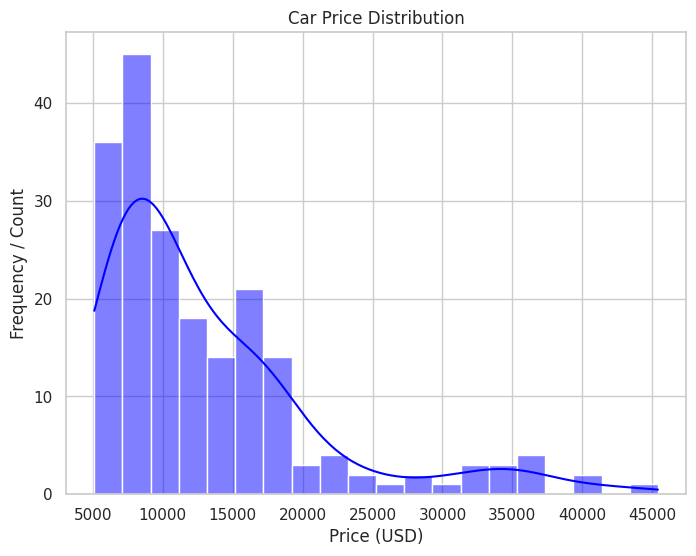

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=20, color='blue')
plt.title('Car Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency / Count')
plt.show()

* **Key Findings:**

  The price distribution is right-skewed, meaning that most of the cars in the dataset are in the lower to mid-range price brackets indicating that there are more affordable cars than high-end luxury vehicles in the dataset. . There are fewer high-end cars, but there are significant outliers where prices are extremely high (e.g., luxury or high-performance vehicles).



---


**Visualization 2:** Heatmap (Correlation Heatmap of Numerical Features)


---


* **What:**

  A heatmap that shows the Pearson correlation coefficients between selected numerical features, including price, horsepower, engine-size, curb-weight, city-mpg, and highway-mpg.

* **How:**

  We use sns.heatmap() to show the correlation between these features where colors represent the strength and direction of correlations. Positive correlations are shown in darker shades of red, while negative correlations are in shades of blue.

* **Why:**

  Understanding correlations between variables helps in feature selection and feature engineering, especially when preparing data for machine learning. Highly correlated variables might be redundant, while understanding how features relate to price can inform predictive modeling.

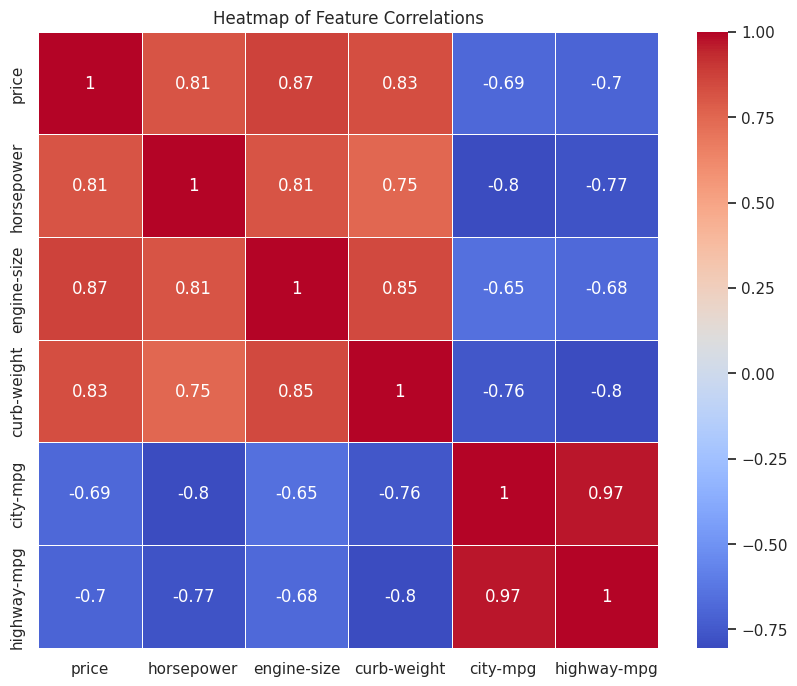

In [25]:
plt.figure(figsize=(10, 8))
numerical_features = df[['price', 'horsepower', 'engine-size', 'curb-weight', 'city-mpg', 'highway-mpg']]
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

* **Key Findings:**

  - **Strong correlations:**

    engine-size and horsepower are highly correlated with each other, as expected, since larger engines typically produce more power. Both features are also positively correlated with price, which means that larger, more powerful cars tend to be more expensive.

 - **Weak correlations:**

    mpg (fuel efficiency) features are negatively correlated with curb-weight and engine-size, suggesting that heavier cars and those with larger engines are less fuel-efficient.



---


**Visualization 3:** Boxplot (Fuel Type vs Car Price Boxplot)


---


* **What:**

  A boxplot comparing the distribution of car prices (price column) for different fuel types (fuel-type feature). This shows how the price distribution varies between gas and diesel cars.

* **How:**

  We use sns.boxplot() with fuel-type on the x-axis and price on the y-axis to compare prices for gas and diesel cars. The box represents the interquartile range (IQR), the line inside the box shows the median price, and "whiskers" extend to show the range of the data. Outliers are plotted as individual points.

* **Why:**

  This comparison is important to explore how fuel type affects the pricing of cars. Diesel engines are often associated with better fuel efficiency and longevity, potentially commanding a higher price. Gasoline cars are more common and usually come with a wider range of prices.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


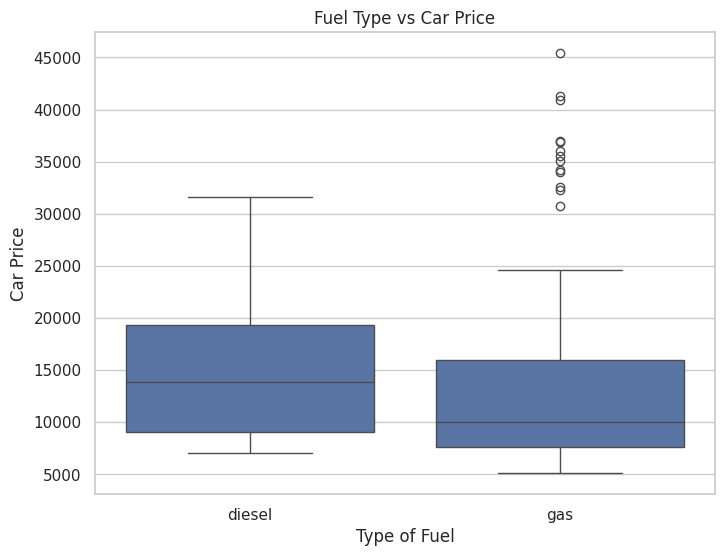

In [26]:
# To make sure 'fuel-type' is treated as a categorical variable
df['fuel-type'] = pd.Categorical(df['fuel-type'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel-type', y='price', data=df)
plt.title('Fuel Type vs Car Price')
plt.xlabel('Type of Fuel')
plt.ylabel('Car Price')
plt.show()

* **Key Findings:**

  Diesel cars tend to have higher prices, as evidenced by the higher median and narrower range of prices compared to gasoline cars. The gasoline-powered cars have a wider range of prices, suggesting that this category includes both economy and high-end models.



---


**Visualization 4:** Scatter plot (Engine Size vs Horsepower Scatter Plot)

---



* **What:**

  A scatter plot visualizing the relationship between engine size (engine-size column) and horsepower (horsepower column).

* **How:**

  We use sns.scatterplot() to show the relationship between these two performance-related variables where each point represents a car in the dataset, with the x and y values indicating its engine size and horsepower.

* **Why:**

  This visualization helps verify an intuitive hypothesis: that larger engines produce more horsepower. It provides insight into the performance characteristics of the cars in the dataset and can inform decisions about which cars offer the best engine performance.

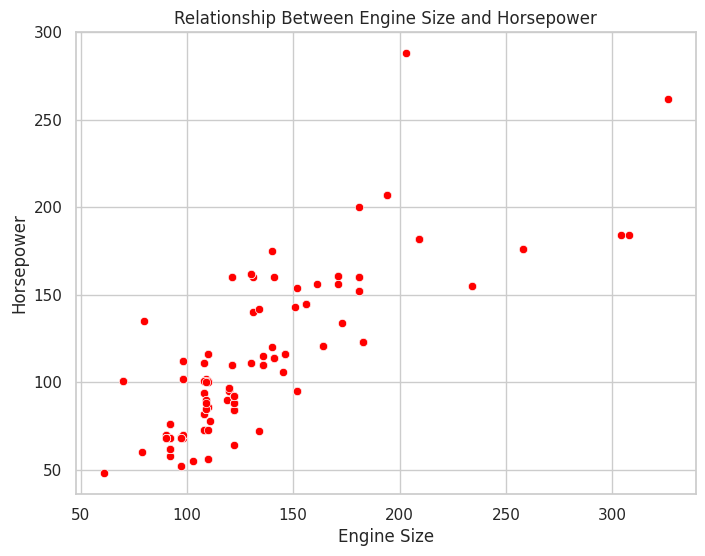

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='horsepower', data=df, color='red')
plt.title('Relationship Between Engine Size and Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

* **Key Findings:**

  There is a clear positive correlation between engine size and horsepower. Cars with larger engines generally produce more horsepower, but there are some outliers where small engines generate high horsepower, potentially due to advanced engineering or turbocharging.



---


**Visualization 5:** Bar plot (Car Body Style vs Average MPG (Fuel Efficiency) Bar Plot)

---



* **What:**

  A bar plot comparing the average fuel efficiency (average-mpg column) across different car body styles (body-style feature).

* **How:**

  We use sns.barplot() to compare the average fuel efficiency for different car body styles. Each bar represents a different body style, with the height of the bar showing the average fuel efficiency.

* **Why:**

  This plot helps compare fuel efficiency across various car body styles, which can be crucial for consumers interested in fuel economy. It also gives insight into the trade-offs between different body styles in terms of design and practicality versus fuel efficiency.

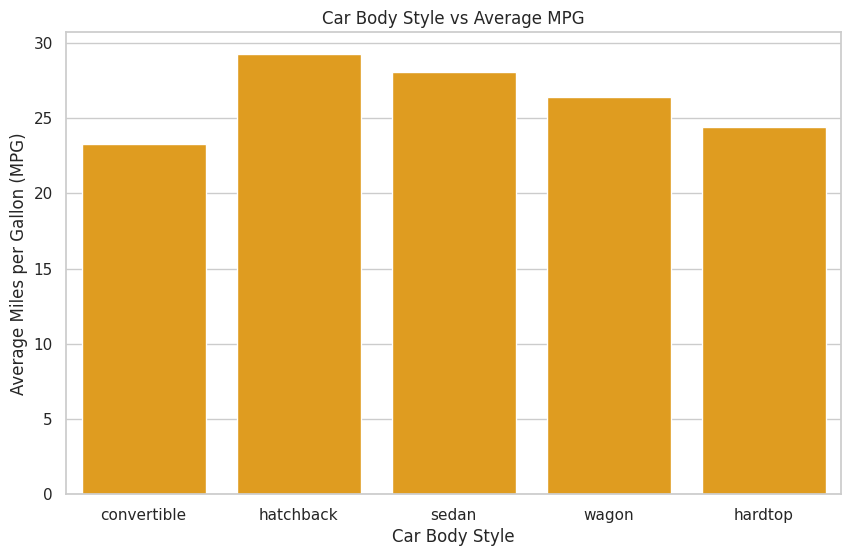

In [28]:
plt.figure(figsize=(10, 6))
df['average-mpg'] = (df['city-mpg'] + df['highway-mpg']) / 2
sns.barplot(x='body-style', y='average-mpg', data=df, errorbar=None, color='orange')
plt.title('Car Body Style vs Average MPG')
plt.xlabel('Car Body Style')
plt.ylabel('Average Miles per Gallon (MPG)')
plt.show()

* **Key Findings:**

  Hatchbacks and sedans are generally more fuel-efficient than other body styles such as convertibles and wagons. This finding suggests that smaller, more compact cars are better choices for consumers focused on fuel economy, while larger cars like convertibles and wagons may sacrifice efficiency for more space or performance.



---


**Visualization 6:** Pie Chart of Cars by Body Style

---



* **What:**

 A pie chart showing the proportion of different car body styles (body-style) in the dataset.

* **How:**

  We use plt.pie() to visualize the distribution of body styles as percentages of the total dataset.

* **Why:**

  This helps in understanding the composition of car types in the dataset, revealing whether certain styles like sedans or hatchbacks are more common. This gives a quick and intuitive look at which types of cars are most frequently represented.

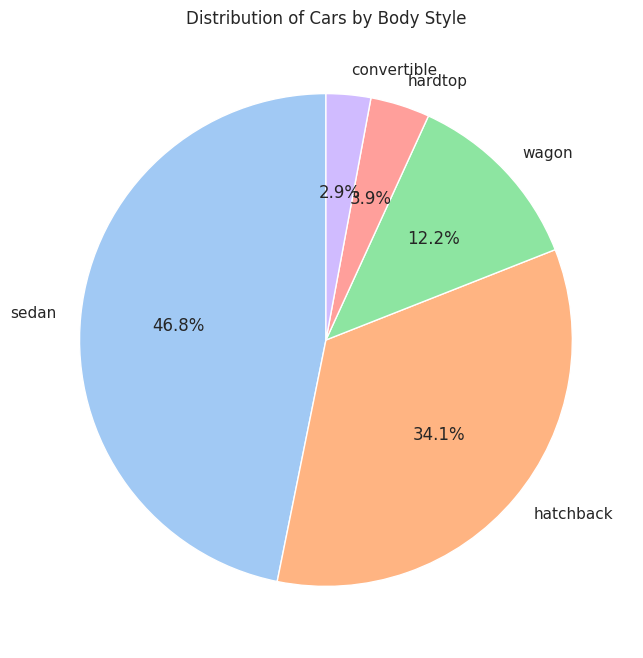

In [29]:
body_style_counts = df['body-style'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Cars by Body Style')
plt.show()

* **Key Findings:**

  Sedans make up the largest portion of the dataset, followed by hatchbacks. This reflects the popularity of these body styles in general, as they are practical and versatile for everyday use.

  Less common body styles, such as convertibles and hardtops, occupy smaller portions, indicating that the dataset contains fewer of these more specialized or performance-oriented vehicles.

  This distribution suggests that the dataset is skewed towards practical, family-oriented cars (like sedans and hatchbacks) rather than exotic or performance models, which could affect analysis related to car design, performance, or price.
